# Spectrogram of wave signal and residual rhase

In this notebook I will plot the spectrogrms the for an speech audio sample and for its residual phase.

## Importing required libraries

In [1]:
import sys
import librosa
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

sys.path.append('../')

from aux.reader import read_data
from residualphase import residual_phase

Using TensorFlow backend.


## Loading data

In [2]:
DATA_PATH = '../data/'
data_df = read_data(DATA_PATH)

filename = data_df.path[1021]
samples, sample_rate = librosa.load('../data/' + filename)

# trim signals
samples, _ = librosa.effects.trim(samples, top_db=30)

## Residual phase calculation

In [3]:
res_phase = residual_phase(samples)

## Log Spectrogram

In the following, I am going to wrap the scipy 'signal.spectrogram' to calculate the log-spectrogram of a sample speech signal. <br>
The function 'signal.spectrogram' frames the speech signal into a sequence of short timeframes with a frame size 'nperseg' and a shift of 'noverlap'. It then applies the Hanning ('Hann') hamming window over each of the frames and compute consecutive Fourier transforms on each frames. <br>
I finally apply the 'numpy.log' function on the returned spectrogram.

In [4]:
def log_specgram(audio, sample_rate, window_size=20, step_size=10, eps=1e-10):
    
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))

    freqs, times, spec = signal.spectrogram(audio,
                                            fs=sample_rate,
                                            window='hann',
                                            nperseg=nperseg,
                                            noverlap=noverlap,
                                            detrend=False)

    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [5]:
freqs_w, times_w, spectrogram_w = log_specgram(samples, sample_rate)
freqs_rp, times_rp, spectrogram_rp = log_specgram(res_phase, sample_rate)

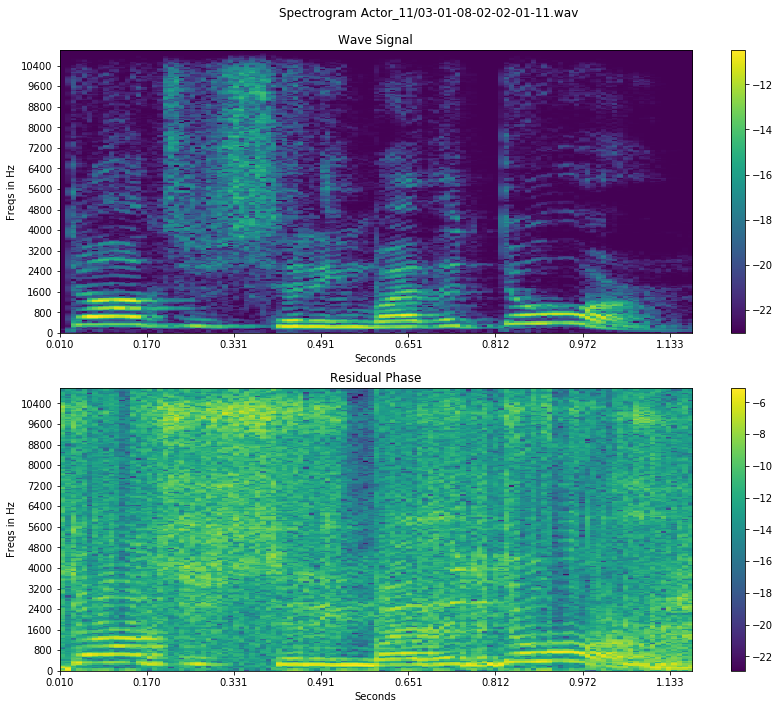

In [7]:
fig = plt.figure(figsize=(12, 10))

plt.subplot(211)
plt.imshow(spectrogram_w.T, aspect='auto', origin='lower', 
           extent=[times_w.min(), times_w.max(), freqs_w.min(), freqs_w.max()])
plt.yticks(freqs_w[::16])
plt.xticks(times_w[::16])
plt.title('Wave Signal')
plt.ylabel('Freqs in Hz')
plt.xlabel('Seconds')
plt.colorbar()

plt.subplot(212)
plt.imshow(spectrogram_rp.T, aspect='auto', origin='lower', 
           extent=[times_rp.min(), times_rp.max(), freqs_rp.min(), freqs_rp.max()])
plt.yticks(freqs_rp[::16])
plt.xticks(times_rp[::16])
plt.title('Residual Phase')
plt.ylabel('Freqs in Hz')
plt.xlabel('Seconds')

plt.suptitle('Spectrogram ' + filename)
plt.tight_layout()
plt.colorbar()

plt.subplots_adjust(top=0.92)
plt.show()

We can observe that the spectrogram of the residual phase shows components distributed across higher frequencies.
The reason for that is found in the calculation of the LP residual: inverse LP analysis removes lower order relations present among the speech samples and retain the higher order relations. The presence of higher order relations are observed in the spectrogram.